In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
# Load the dataset
fruits = pd.read_table('fruit_data_with_colors.txt')

We have loaded our dataset, now we will check it's first five rows to check how our data looks, which features our data have.

In [51]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [6]:
# checking first five rows of our dataset
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [13]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
predct = dict(zip(fruits["fruit_label"].unique(), fruits["fruit_name"].unique()))  
predct

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

Dataset have seven columns containing the information about fruits. Here only two fruits i.e apple and mandarin are seen. Every fruit is described with four features i.e 1) mass of fruit 2) width of fruit 3) what is height and 4) what is color score of fruit. Now we have to check how many fruits are present in our data. 

In [18]:
#checking how many unique fruit names are present in the dataset
fruits['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

We have seen that the dataset contains four unique fruits. apple with 19 entries, orange with 19 entries, lemon with 16 entries and mandarin with 5 entries. 

Now we will store all unique data on four different dataframes.

In [19]:
apple_data = fruits[fruits['fruit_name']=='apple']
orange_data = fruits[fruits['fruit_name']=='orange']
lemon_data = fruits[fruits['fruit_name']=='lemon']
mandarin_data = fruits[fruits['fruit_name']=='mandarin']

In [20]:
apple_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [21]:
mandarin_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81


In [22]:
orange_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
24,3,orange,spanish_jumbo,342,9.0,9.4,0.75
25,3,orange,spanish_jumbo,356,9.2,9.2,0.75
26,3,orange,spanish_jumbo,362,9.6,9.2,0.74
27,3,orange,selected_seconds,204,7.5,9.2,0.77
28,3,orange,selected_seconds,140,6.7,7.1,0.72


In [23]:
lemon_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
43,4,lemon,spanish_belsan,194,7.2,10.3,0.70
44,4,lemon,spanish_belsan,200,7.3,10.5,0.72
45,4,lemon,spanish_belsan,186,7.2,9.2,0.72
46,4,lemon,spanish_belsan,216,7.3,10.2,0.71
47,4,lemon,spanish_belsan,196,7.3,9.7,0.72


By looking above data, it is shown that for every fruit there is a fruit_label. For apple it is 1, for mandarin it is 2, for orange it is 3 and for lemon it is 4. Now we will visualize this data on plots for further exploration.

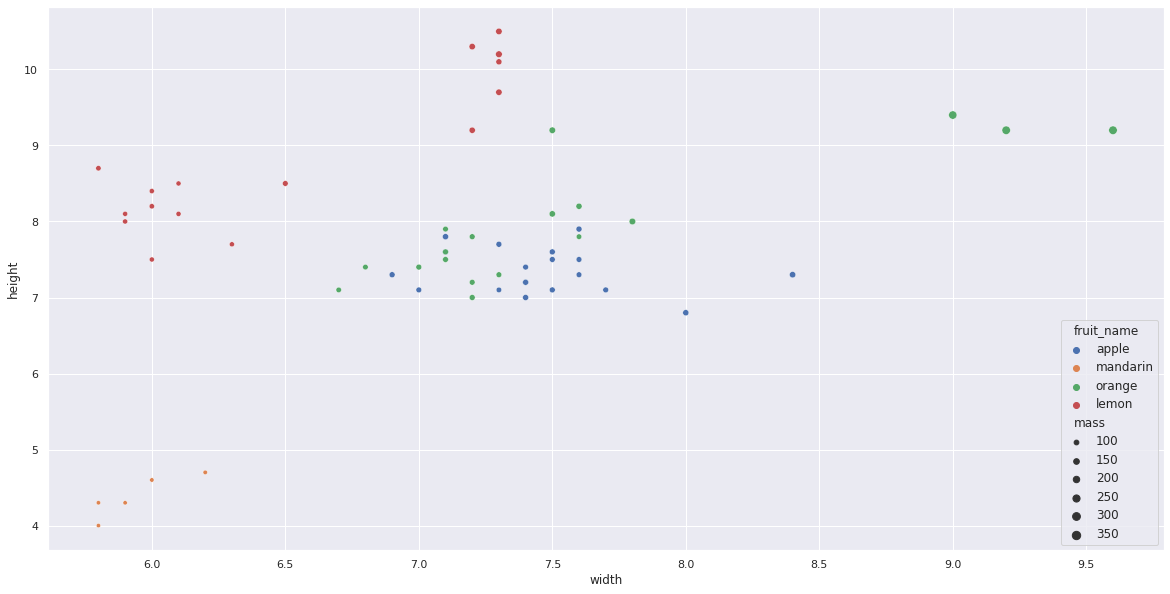

In [33]:
sns.set(rc = {"figure.figsize":(20, 10)}) 
sns.scatterplot(
    x = fruits['width'],
    y = fruits['height'],
    size = fruits["mass"],
    hue = fruits["fruit_name"]
    )

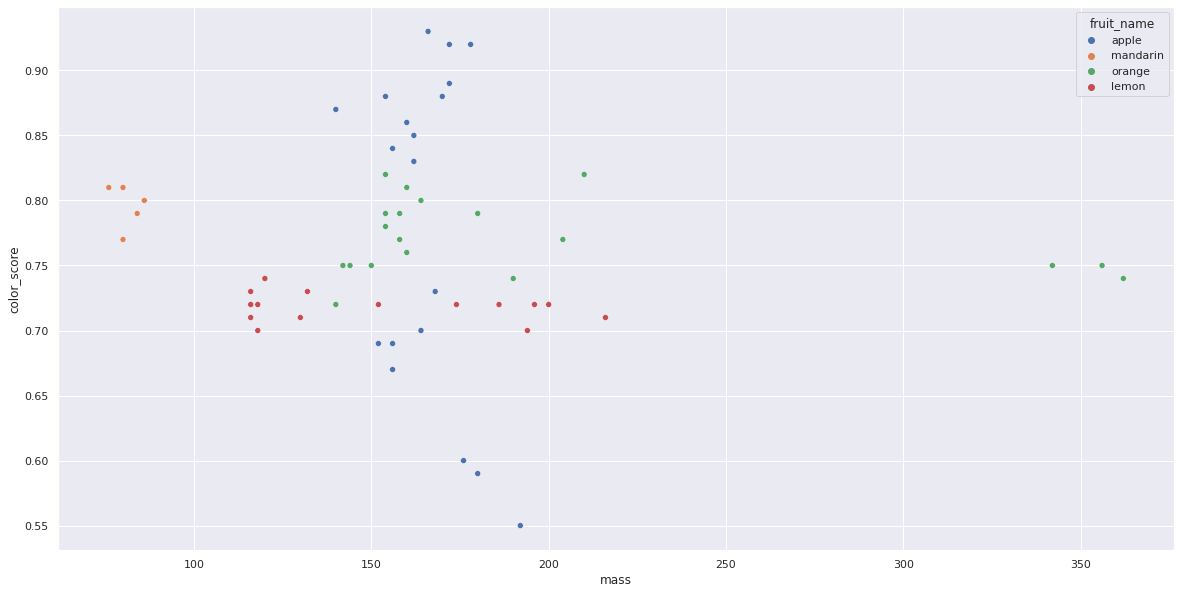

In [34]:
sns.set(rc = {"figure.figsize":(20, 10)}) 
sns.scatterplot(
    x = fruits['mass'],
    y = fruits['color_score'],
    hue = fruits["fruit_name"]
    )

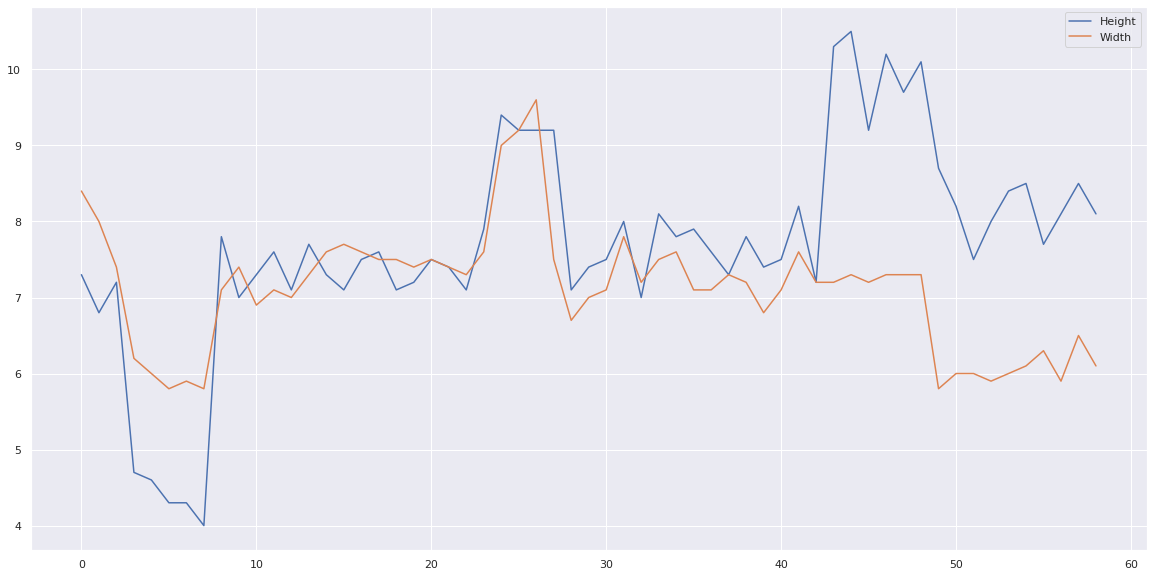

In [35]:
plt.plot(fruits['height'], label = 'Height')
plt.plot(fruits['width'], label = 'Width')
plt.legend()

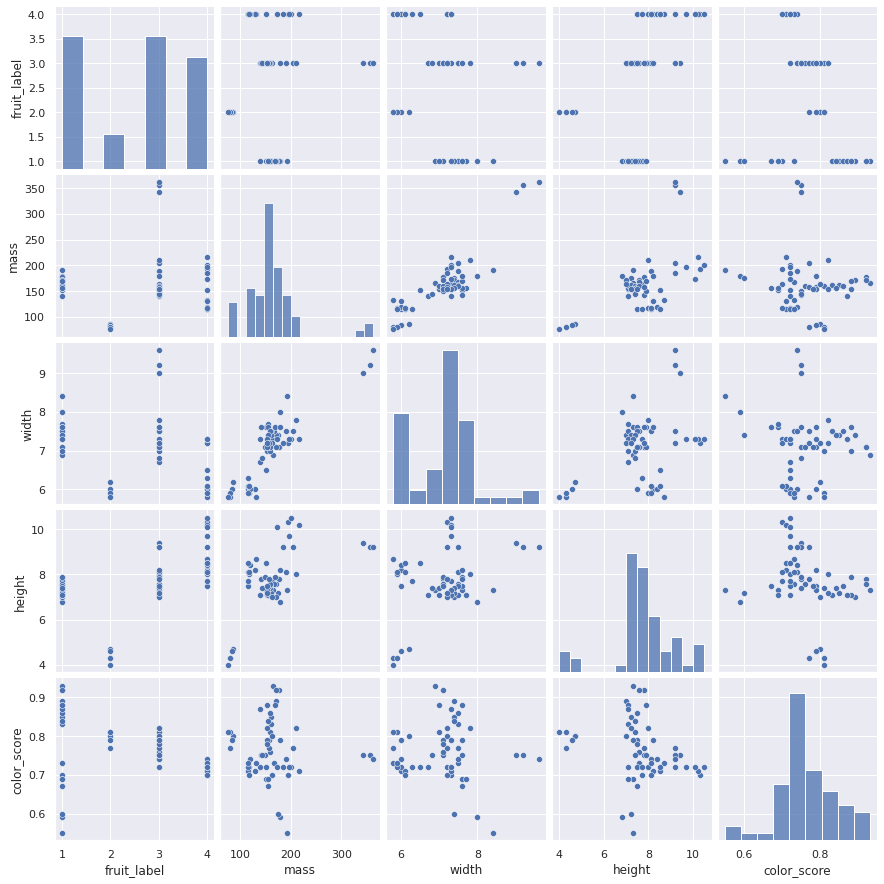

In [36]:
sns.pairplot(fruits)

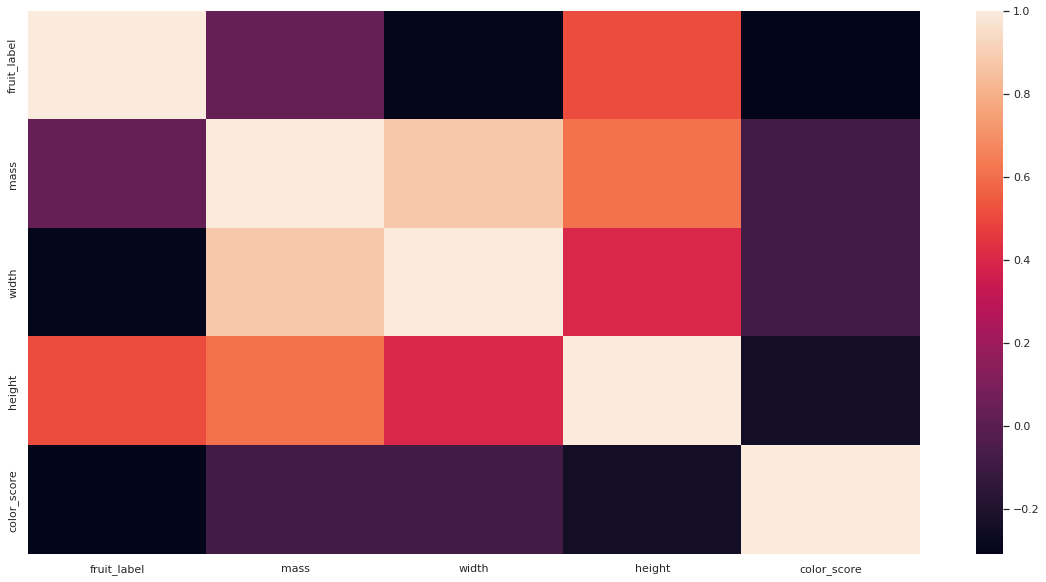

In [38]:
sns.heatmap(fruits.corr())

Now we will use K-Nearest Neighbors classifier to predict a new record on the basis of this data. For this we will aplit this dataset into test and train sets. First we will import sklearn library for our model.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [42]:
# Select X, y and split the data in train and test
X = fruits[['mass','width','height', "color_score"]]
Y = fruits['fruit_label']
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=0)

In [43]:
X_train.describe()

,mass,width,height,color_score
count,44.000000,44.000000,44.000000,44.000000
mean,159.090909,7.038636,7.643182,0.759773
std,53.316876,0.835886,1.370350,0.074568
min,76.000000,5.800000,4.000000,0.550000
25%,127.500000,6.175000,7.200000,0.720000
50%,157.000000,7.200000,7.600000,0.750000
75%,172.500000,7.500000,8.250000,0.810000
max,356.000000,9.200000,10.500000,0.920000


In [44]:
X_test.describe()

,mass,width,height,color_score
count,15.000000,15.00000,15.000000,15.000000
mean,174.933333,7.30000,7.840000,0.772000
std,60.075508,0.75119,1.369463,0.085289
min,84.000000,6.00000,4.600000,0.600000
25%,146.000000,7.10000,7.250000,0.730000
50%,166.000000,7.20000,7.600000,0.750000
75%,185.000000,7.45000,8.150000,0.790000
max,362.000000,9.60000,10.300000,0.930000


Now we will create a KNN classifier for making predictions.

In [72]:
knn = KNeighborsClassifier(6)

In [73]:
# Fit it
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

We can check the accuracy of our classifier and some other validations

In [74]:
# Take the accuracy
knn.score(X_test, y_test)

0.6

Now we can make predictions with new data as following:

In [63]:
# Predictions
# parameters of following function are mass,width and height
# example1 -> 100, 6.3, 8

prediction1 = knn.predict([[100, 6.3, 8,  0.75]])
predct[prediction1[0]]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


'lemon'

In [64]:
# Predictions
# parameters of following function are mass,width and height
# example1 -> 300, 7, 10

prediction2 = knn.predict([[300, 7, 10, 0.71]])
predct[prediction2[0]]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


'orange'

Yes, our model is running successfully and making accurate predictions.
Enjoy....!

In [57]:
k_range = range(1, 40)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

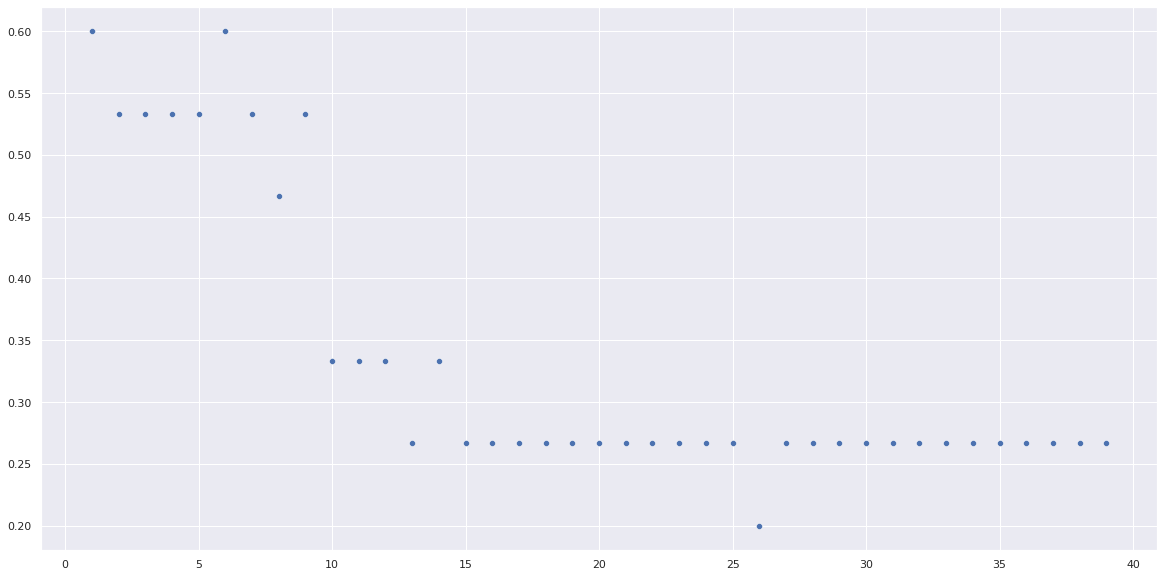

In [59]:
sns.scatterplot(
    x = k_range,
    y = scores );

In [65]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
parameters = { 'n_neighbors': range(1, 40) }
clf = GridSearchCV(knn, parameters, scoring = 'accuracy')

In [68]:
clf.fit(X, Y)

print(clf.best_params_)
print(clf.best_estimator_)
print(clf.best_score_)

{'n_neighbors': 7}
KNeighborsClassifier(n_neighbors=7)
0.6424242424242425
